ML model workflow

1. Get Data ready (turn into tensors)
2. Pickup a pretrained model or build the model
    - a. Choose Loss function and optimizer
    - b. Build a training loop (epochs)
3. Fit the model to the data and make predictions
4. Evaluate the model
5. Run bias varaince diagnostics, error analysis, improve the model through experimentation
6. Save and reload the trained model into another loacation like a server delpyment for real time inference

Ref link - https://www.learnpytorch.io/01_pytorch_workflow/

<img src="https://drive.google.com/uc?id=19lQa3bmTDLw9L4hLOEdp05RN1JeuhdSW" />

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks, responsible for creating computational graphs
import matplotlib.pyplot as plt

In [ ]:
torch.__version__

'2.1.0+cu118'

### **1.Data Preparing and DataLoading**

We first convert our data into numerical format depending on data we have, that is understandable by the ML algorithms (numerical encoding)

After that, we ll use Dataset and DataLoader.

PyTorch has two primitives to work with data: torch.utils.data.DataLoader and torch.utils.data.Dataset. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset.

- Dataset
- DataLoader

Here, we are gonna implement Univariate Linear regression

In [ ]:
#Lets create linear regression using hardcoded values
#params
weight = 0.7
bias = 0.3

#create 50 samples of X
X = torch.arange(start=0, end=1, step=0.02).unsqueeze(dim=1) #explanatory variable - 50 samples are created - (50, 1)
Y = weight * X + bias #dependant variable true function

X[:10], X.shape, Y[:10], Y.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 torch.Size([50, 1]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 torch.Size([50, 1]))

### **1.1 Splitting the data into train, validation and test sets**

- We can use scikitlearn train test split method ```sklearn.model_selection.train_test_split```
- We can use simple percentage split technique

In [ ]:
#Creating the splitd
train_split = int(0.8 * len(X))
print(train_split) #len(X)=50', 4/5th of 50 = 50 / 0.8 = 40

40


In [ ]:
#train test splits
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

print("X_train: "+str(X_train.shape))
print("Y_train: "+str(Y_train.shape))
print("X_test: "+str(X_test.shape))
print("Y_test: "+str(Y_test.shape))

X_train: torch.Size([40, 1])
Y_train: torch.Size([40, 1])
X_test: torch.Size([10, 1])
Y_test: torch.Size([10, 1])


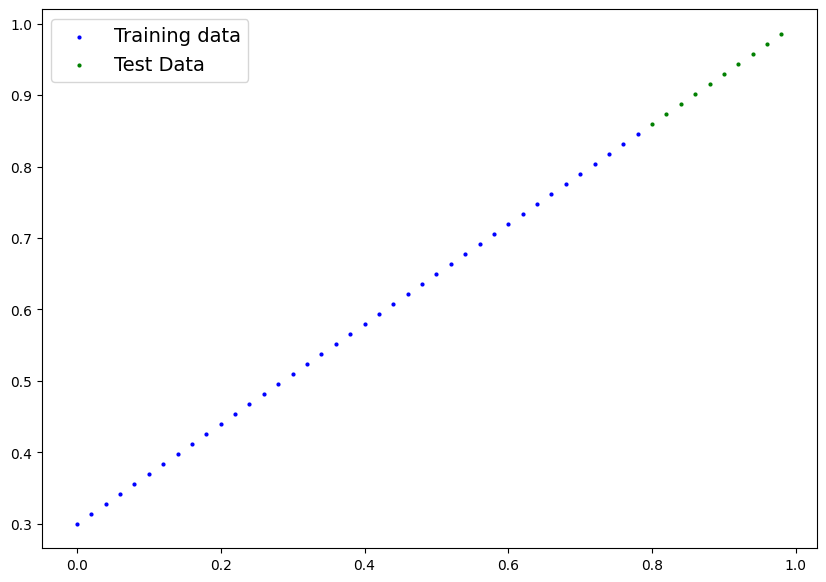

In [ ]:
#Visualizations
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train, train_labels=Y_train,
                     test_data=X_test, test_labels=Y_test, predictions=None):
    plt.figure(figsize=(10, 7))

    #plot the training data
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    #plot the test data
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

    #If predictions are not None, plot the predictions of test data
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size":14})
    plt.show()

plot_predictions()

### **2. Build our first Linear regression model in Pytorch to learn from our created data**

To define a neural network/model in PyTorch, we create a class that inherits from nn.Module. We define the layers of the network in the __init__ function and specify how data will pass through the network in the forward function. To accelerate operations in the neural network, we move it to the GPU or MPS if available.

https://pytorch.org/docs/stable/generated/torch.nn.Module.html

In [ ]:
#Linear regression module
import torch
from torch import nn

class LinearRegressionModel(nn.Module): #every class subclasses nn.Modules, and nn module contains all buildings for computational graphs
    def __init__(self): #constructor
        super().__init__()
        #initialize params
        self.weights = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float) #flaot32/float are similar, requires_grad is the flag that enables torch.autograd
        )
        #Parameter is Just like tensorflow Variable creation, includes in computational graph
        self.bias = nn.Parameter(
            torch.randn(1, dtype=torch.float, requires_grad=True)
        )

    #forward pass which defines the computation steps in the model - abstract method of nn.Module, must be overidden in subclass
    def forward(self, x: torch.Tensor) -> torch.Tensor: #x is of type torch.tensor and the function also returns torch tensor
        return self.weights * x + self.bias # this is the linear regression formula (y = m*x + b)

### **PyTorch model building essentials**
PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are ```torch.nn, torch.optim, torch.utils.data.Dataset and torch.utils.data.DataLoader```. For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

PyTorch module	 - What does it do?
* ```torch.nn```	- Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).
    * ```torch.nn.Parameter``` -	Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".
    * ```torch.nn.Module``` -	The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.

    * ```def forward()``` -	All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module via calling the model using modelclss(vars) (e.g. the linear regression formula above).
    * ```torch.nn.Lossfunctions```
        * ```torch.nn.L1Loss```
        * ```torch.nn.SmoothL1Loss```
        * ```torch.nn.MSELoss```
        * ```torch.nn.CrossEntropyLoss```
        * ```torch.nn.BCELoss```
        * ```torch.nn.KLDivLoss```
        * ```torch.nn.BCEWithLogitsLoss```
        * ```torch.nn.TripletMarginLoss```
        * ```torch.nn.TripletMarginWithDistanceLoss```

* ```torch.optim``` - Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).

In [ ]:
#lets create an instance of your model before initializing the optimizer and check the contents of our model

# Set manual seed since nn.Parameter are randomly initialzied in the constructor - for reproducibility
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model0 = LinearRegressionModel()

#lets see what our model instance contains
print(model0)

# Check the nn.Parameter(s) within the nn.Module subclass we created
print(model0.parameters()) #returns generator object

#lets conver it to list and see what it contains
print(list(model0.parameters())) #it returns the model parameters that is initialized within the constructor using torch.randn

LinearRegressionModel()
<generator object Module.parameters at 0x7bccd21f7060>
[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [ ]:
#List named parameters
print(model0.state_dict()) #state_dict gives parameters of the model as a dictionary with names

#the ML model will try to approximate these random params as close to our true weight and bias which
weight, bias

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


(0.7, 0.3)

### **torch.inference_mode()**

Check the predictive power of a model.

We use torch.inference_mode() as a context manager to make the predictions.

As the name suggests, torch.inference_mode() is used when using a model for inference (making predictions).

```Syntax```
```
with torch.inference_mode():
    Y_preds = model(X_test)
```
We could also just do ```Y_preds = model(X_test)``` for making predictions

But,

```torch.inference_mode() turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make forward-passes (data going through the forward() method) faster.```

**Note:**
In older PyTorch code, you may also see ```with torch.no_grad():``` being used for inference. While ```torch.inference_mode()``` and ```torch.no_grad()``` do similar things, ```torch.inference_mode()``` is newer, potentially faster and preferred.

**Note**

Here, we are just checking the predictive power of our random model

Making predictions using our model before even optimizing to see how it generalizes to our test data - Note here, there is no training happening, bcuz we are not using optimizer or anything to train our model


To check this, we can pass it the test data X_test to see how closely it predicts Y_test.

When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've defined.

Let's make some predictions.

In [ ]:
#check the predictive power of our random model
#making predictions using our model before even optimizing to see how it generalizes to our test data - there is no training happening
#torch.inference_mode()

with torch.inference_mode(): #context manager
    Y_preds = model0(X_test) #it sends the data to the forward method of our model

Y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
#Lets see what our true labels are, for our test data
Y_test #very different from the preds

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

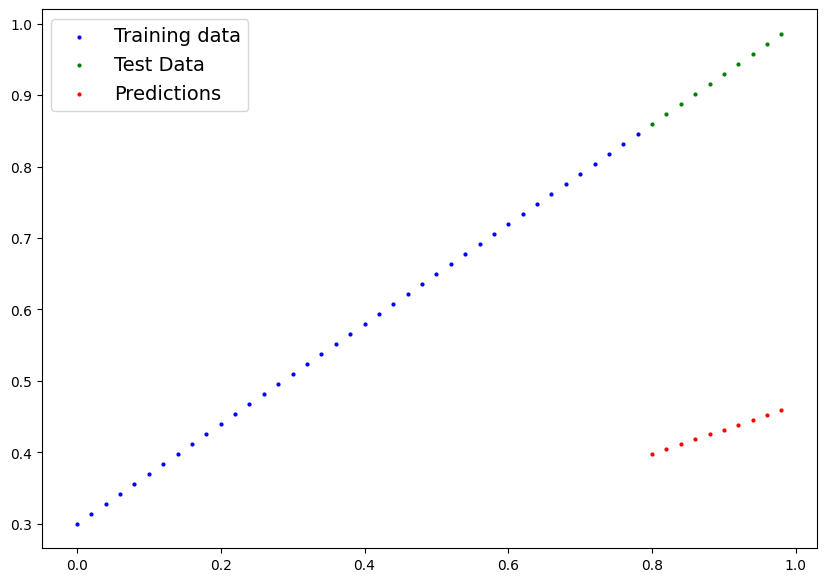

In [ ]:
#visualize where are preds are
plot_predictions(X_train, Y_train, X_test, Y_test, predictions=Y_preds)

#see preds are very far from our true test labels, this is bcz, this is random model and we didnt actually train/fit our model to the data

### **Train the model**

Right now our model is making predictions using random parameters to make calculations, it's basically guessing (randomly).

To fix that, we can update its internal parameters (I also refer to parameters as patterns), the weights and bias values we set randomly using nn.Parameter() and torch.randn() to be something that better represents the data.

We could hard code this (since we know the default values weight=0.7 and bias=0.3) but where's the fun in that?

Much of the time you won't know what the ideal parameters are for a model.

Instead, we write code to see if the model can try and figure them out itself.

### **Creating a loss function and optimizer in PyTorch**

For our model to update its parameters on its own, we'll need to add a few more things to our recipe.

And thats a ```loss function``` as well as an ```optimizer```.

The roles of these are:

**Function	- What does it do? -	Where does it live in PyTorch?	- Common values**

- ```Loss function```
    - Measures how wrong your models predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). Lower the better.
    - PyTorch has plenty of built-in loss functions in ```torch.nn```.
    - Mean absolute error (MAE) for regression problems (```torch.nn.L1Loss()```). Binary cross entropy for binary classification problems (```torch.nn.BCELoss()```).
- ```Optimizer```
    - Tells your model how to update its internal parameters to best lower the loss.
    - You can find various optimization function implementations in ```torch.optim```.
    - Stochastic gradient descent (```torch.optim.SGD()```). Adam optimizer (```torch.optim.Adam()```).

Let's create a loss function and an optimizer we can use to help improve our model.

Depending on what kind of problem you're working on will depend on what loss function and what optimizer you use.

However, there are some common values, that are known to work well such as the SGD (stochastic gradient descent) or Adam optimizer. And the MAE (mean absolute error) or MSE(mean squared error) loss function for regression problems (predicting a number) or binary cross entropy loss function for classification problems (predicting one thing or another).

For our problem, since we're predicting a number, let's use MAE (which is under torch.nn.L1Loss()) in PyTorch as our loss function.

- Mean absolute error (MAE, in PyTorch: ```torch.nn.L1Loss```) measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples.

- And we'll use SGD, ```torch.optim.SGD(params, lr)``` where:
    - ```params``` is the target model parameters you'd like to optimize (e.g. the ```weights``` and ```bias``` values we randomly set before).
    - ```lr``` is the learning rate you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a hyperparameter (because it's set by a machine learning engineer). Common starting values for the learning rate are ```0.01, 0.001, 0.0001,``` however, these can also be adjusted over time (this is called ```learning rate scheduling\annealing```).
    
Woah, that's a lot, let's see it in code.

In [ ]:
#Set up the Loss function
loss_fn = nn.L1Loss()

loss_fn

L1Loss()

In [ ]:
#Set up the optimizer
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.01)

### **Building the Training loop(i.e Optimization Loop) and Testing loop**

**Creating an optimization loop in PyTorch**

Woohoo! Now we've got a loss function and an optimizer, it's now time to create a training loop (and testing loop).

- The training loop involves the model going through the training data and learning the relationships between the features and labels.

- The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data (the model never see's the testing data during training).

Each of these is called a "loop" because we want our model to look (loop through) at each sample in each dataset.

There will be a fair bit of code but nothing we can't handle.

#### **PyTorch training loop**
For the training loop, we'll build the following steps:

**```Number -	Step name -	What does it do? -	Code example```**

1.	```Forward pass```:	The model goes through all of the training data once, performing its forward() function calculations.	```model(x_train)```
2.```Calculate the loss```:	The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.	```loss = loss_fn(y_pred, y_train)```
3. ```Zero gradients```:	The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step.	```optimizer.zero_grad()```
4.```Perform backpropagation on the loss```: Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with ```requires_grad=True```). This is known as backpropagation, hence "backwards".	```loss.backward()```
5.```Update the optimizer (gradient descent)```:	Update the parameters with ```requires_grad=True``` with respect to the loss gradients in order to improve them.	```optimizer.step()```

**Note**:

The above is just one example of how the steps could be ordered or described. With experience you'll find making PyTorch training loops can be quite flexible.And on the ordering of things, the above is a good default order but you may see slightly different orders.

**Some rules of thumb**:
- Calculate the loss (loss = ...) before performing backpropagation on it (loss.backward()).
- Zero gradients (optimizer.zero_grad()) before stepping them (optimizer.step()).
- Step the optimizer (optimizer.step()) after performing backpropagation on the loss (loss.backward()).

For resources to help understand what's happening behind the scenes with backpropagation and gradient descent, see the extra-curriculum section.

### **PyTorch testing loop**
As for the testing loop (evaluating our model), the typical steps include:

**```Number-	Step name-	What does it do?-	Code example**```

1.```Forward pass```:	The model goes through all of the data once, performing its forward() function calculations.	```model(x_test)```

2.```Calculate the loss```:	The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.	```loss = loss_fn(y_pred, y_test)```

3.```Calulate evaluation metrics```:(optional)	Alongside the loss value you may want to calculate other evaluation metrics such as ```accuracy``` on the test set.	```Custom functions```

Notice the testing loop doesn't contain performing backpropagation (loss.backward()) or stepping the optimizer (optimizer.step()), this is because no parameters in the model are being changed during testing, they've already been calculated when training. For testing, we're only interested in the output of the forward pass through the model.

Let's put all of the above together and train our model for 100 epochs (forward passes through the data) and we'll evaluate it every 10 epochs.

In [ ]:
#lets just print the initial params before training
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#Building a training loop
torch.manual_seed(42) #set the seed before the optimization loop as well for reproducibility
epochs = 200
epoch_count = []
train_losses = []
test_losses = []
for i in range(epochs):
    #First set the model to training mode (this is the default state of a model)
    model0.train() #this basically sets all the parameters require_gradients=True if not set already to calculate gradients of those params w.r.to loss

    #Forward pass
    Y_train_preds = model0(X_train)

    #Calculate Loss
    loss = loss_fn(Y_train_preds, Y_train)

    #Optimizer zero grad
    optimizer.zero_grad()

    #Backprop - calculate gradients of Loss w.r.to params
    loss.backward()

    #Optimization - Gradient descent to update the params
    optimizer.step()

    #Model Testing - Note that we can always write the evalaution/testing outside of the training loop
    #put the model in eval mode which basically sets the params requires_grad=False to avoid backprop during evaluation/testing, also many things like BatchNorm, dropout and so on that is not required for testing/evaluation
    model0.eval()
    with torch.inference_mode(): #turns off gradient tracking
        #do the forward pass of our test dataset
        Y_test_preds = model0(X_test)

        #calculate test loss
        test_loss = loss_fn(Y_test_preds, Y_test)

    if i % 10 == 0:
        # print(type(loss)) #<class 'torch.Tensor'>
        epoch_count.append(i)
        train_losses.append(loss.detach().numpy()) #you have to detach, otherwise u get this error  Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.
        test_losses.append(test_loss.detach().numpy())
        print(f"Epoch: {i} | Train Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Train Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch: 10 | Train Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Epoch: 20 | Train Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch: 30 | Train Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Epoch: 40 | Train Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Epoch: 50 | Train Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Epoch: 60 | Train Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Epoch: 70 | Train Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
Epoch: 80 | Train Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
Epoch: 90 | Train Loss: 0.02788739837706089 | Test Loss: 0.06473556160926819
Epoch: 100 | Train Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch: 110 | Train Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
Epoch: 120 | Train Loss: 0.01758546568453312 | Test Loss: 0.040604822337627

### **zero_grad()**
    
In PyTorch, for every mini-batch during the training phase, we typically want to explicitly set the gradients to zero before starting to do backpropagation (i.e., updating the Weights and biases) because PyTorch accumulates the gradients on subsequent backward passes. This accumulating behavior is convenient while training RNNs or when we want to compute the gradient of the loss summed over multiple mini-batches. So, the default action has been set to accumulate (i.e. sum) the gradients on every loss.backward() call.

Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly. Otherwise, the gradient would be a combination of the old gradient, which you have already used to update your model parameters and the newly-computed gradient. It would therefore point in some other direction than the intended direction towards the minimum (or maximum, in case of maximization objectives).

**Note:**

The accumulation (i.e., sum) of gradients happens when .backward() is called on the loss tensor.
As of v1.7.0, Pytorch offers the option to reset the gradients to None optimizer.zero_grad(set_to_none=True) instead of filling them with a tensor of zeroes. The docs claim that this setting reduces memory requirements and slightly improves performance, but might be error-prone if not handled carefully.

https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch

In [ ]:
print(model0.state_dict())
#see how they are very close tpu pur true weight 7 and bias 3

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


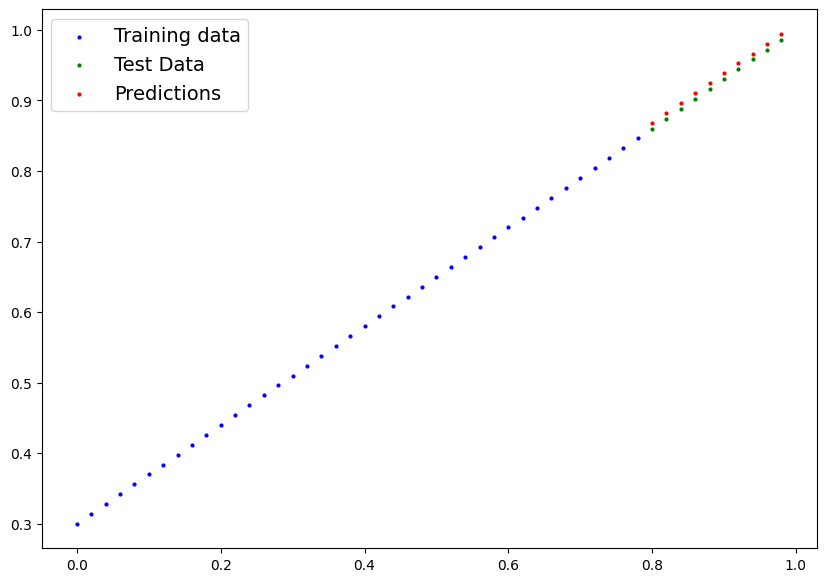

In [ ]:
#plot the predictions - see how the preds moved to true preds
plot_predictions(X_train, Y_train, X_test, Y_test, Y_test_preds)

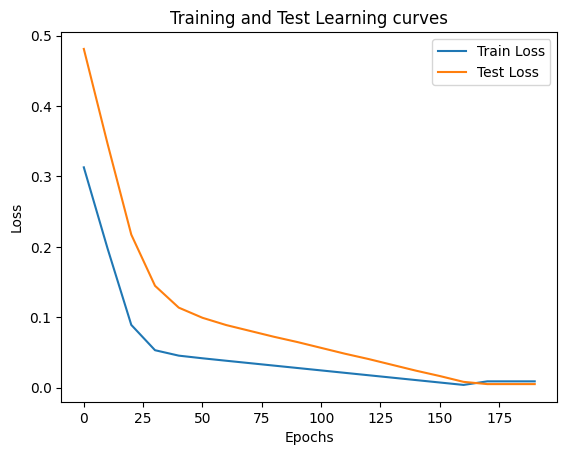

In [ ]:
#Plot the learning curve loss vs epoch
# print(train_losses)
plt.plot(epoch_count, train_losses, label="Train Loss")
plt.plot(epoch_count, test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Test Learning curves")
plt.legend()
plt.show()

### **Saving the model**

If you've trained a PyTorch model, chances are you'll want to save it and export it somewhere.

As in, you might train it on Google Colab or your local machine with a GPU but you'd like to now export it to some sort of application where others can use it.

Or maybe you'd like to save your progress on a model and come back and load it back later.

For saving and loading models in PyTorch, there are three main methods you should be aware of (all of below have been taken from the PyTorch saving and loading models guide):

```PyTorch method -	What does it do?```
- ```torch.save()``` :	Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.
- ```torch.load()```:	Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).
-```torch.nn.Module.load_state_dict()```: Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.

**Note**: As stated in Python's pickle documentation, the pickle module is not secure. That means you should only ever unpickle (load) data you trust. That goes for loading PyTorch models as well. Only ever use saved PyTorch models from sources you trust.

###**Saving a PyTorch model's state_dict()**

The recommended way for saving and loading a model for inference (making predictions) is by saving and loading a model's state_dict().

Let's see how we can do that in a few steps:

1. We'll **create a directory** for saving models to called models using **Python's pathlib module**.
2. We'll create a file path to save the model to.
3. We'll call **torch.save(obj, f)** where obj is the target model's state_dict() and f is the filename of where to save the model.

**Note**: It's common convention for PyTorch saved models or objects to end with .pt or .pth, like saved_model_01.pth.

In [ ]:
#Lets see what our state_dict has after training. It contains the optimized params
model0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#saving our model
from pathlib import Path

#first create directory name called models in our colab instance
MODEL_PATH = Path("models")
#create the directory
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#Create model save path - we give the name of our saved model under our created directory
MODEL_NAME = "01_pytorch_linear_regression_model.pth" #use either .pth or .pt to save python objects
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#Save the model state_dict() in the speicfied path
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model0.state_dict(), f=MODEL_SAVE_PATH)
#Note: we should download the saved model for future loading, bcuz we are saving it in colab instance here, if the runtime is disconnected, then the saved model will be gone and you have to rerun. You can also use google colab commands to save it to drive

Saving model to: models/01_pytorch_linear_regression_model.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1722 Nov 26 20:55 01_pytorch_linear_regression_model.pth


### **Loading a saved PyTorch model's state_dict()**

Since we've now got a saved model state_dict() at models/01_pytorch_linear_regression_model.pth we can now load it in using ```torch.nn.Module.load_state_dict(torch.load(f))``` where f is the filepath of our saved model state_dict().

**Why call torch.load() inside torch.nn.Module.load_state_dict()?**

Because we only saved the model's state_dict() which is a dictionary of learned parameters and not the entire model, we first have to load the state_dict() with torch.load() and then pass that state_dict() to a new instance of our model (which is a subclass of nn.Module).

**Why not save the entire model?**

Saving the entire model rather than just the state_dict() is more intuitive, however, to quote the PyTorch documentation (italics mine):

```The disadvantage of this approach (saving the whole model) is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved. Because of this, your code can break in various ways when used in other projects or after refactors.```

So instead, we're using the flexible method of saving and loading just the state_dict(), which again is basically a dictionary of model parameters.

Let's test it out by created another instance of LinearRegressionModel(), which is a subclass of torch.nn.Module and will hence have the in-built method load_state_dict().

In [ ]:
#Just printing our trained model state_dict() which we already saved
model0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#Lets load the saved model state_dict using torch.load() and torch.nn.Module.load_state_dict()

#First create a new instance of our model and this is usually the torch.nn.Module instance right. with just random params, this is just a random instance of our model. We load the saved dict on this new nn.Module instance
loaded_model_0 = LinearRegressionModel()

#Load the saved state_dict of model0 using our new nn.Module instance and this will update our new instance params(that were random) with our trained params that we are loading
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict() #see the params are same as our model0 for our new instance now

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#Make predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    Y_test_preds_loaded = loaded_model_0(X_test)

Y_test_preds_loaded

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
#Lets compare loaded model preds with our actual original model0 to see that they are same or not
Y_test_preds == Y_test_preds_loaded

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

Nice!

It looks like the loaded model predictions are the same as the previous model predictions (predictions made prior to saving). This indicates our model is saving and loading as expected.

Note: There are more methods to save and load PyTorch models but I'll leave these for extra-curriculum and further reading. See the PyTorch guide for saving and loading models for more.

https://pytorch.org/tutorials/beginner/saving_loading_models.html

### **6. Putting it all together**

We've covered a fair bit of ground so far.

But once you've had some practice, you'll be performing the above steps like dancing down the street.

Speaking of practice, let's put everything we've done so far together.

Except this time we'll make our code device agnostic (so if there's a GPU available, it'll use it and if not, it will default to the CPU).

There'll be far less commentary in this section than above since what we're going to go through has already been covered.

We'll start by importing the standard libraries we need.

Note: If you're using Google Colab, to setup a GPU, go to Runtime -> Change runtime type -> Hardware acceleration -> GPU. If you do this, it will reset the Colab runtime and you will lose saved variables.

**We do a small change here though:**

We'll create the same style of model as before except this time, instead of defining the weight and bias parameters of our model manually using ```nn.Parameter()```, we'll use ```nn.Linear(in_features, out_features)``` to do it for us.

Where ```in_features``` is the number of dimensions your input data has and ```out_features``` is the number of dimensions you'd like it to be output to.

In our case, both of these are 1 since our data has 1 input feature (X) per label (y).

We also change the forward function accordingly from:
```
def forward(self, x: torch.tensor) -> torch.tensor:
    return self.weights * x + self.bias
```
to

```
def forward(self, x: torch.tensor) -> torch.tensor:
    return self.linear_layer(x)
```

Notice the outputs of this new technique with ```model.state_dict()```, the ```nn.Linear()``` layer created a random weight and bias parameter for us.

We can also put our model, the data as well on the GPU (if it's available).

We can change the device our PyTorch objects are on using ```.to(device)```.

We can check the model's current device using
```next(model.parameters()).device```

Using Device: cuda
X_train shape: torch.Size([80, 1]), Y_train shape: torch.Size([80, 1])
X_test shape: torch.Size([20, 1]), Y_test shape: torch.Size([20, 1])
Linear model initial: LinearRegressionMdl(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Linear model initial state dict: OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])
Model currently using device: cpu
After - Model currently using device: cuda:0
Epoch: 0 | Training Loss: 0.5555006265640259 | Test Loss: 0.574234664440155
Epoch: 100 | Training Loss: 0.006589987780898809 | Test Loss: 0.014520359225571156
Epoch: 200 | Training Loss: 0.00668717036023736 | Test Loss: 0.00915310438722372
Epoch: 300 | Training Loss: 0.00668717036023736 | Test Loss: 0.00915310438722372
Epoch: 400 | Training Loss: 0.00668717036023736 | Test Loss: 0.00915310438722372
Epoch: 500 | Training Loss: 0.00668717036023736 | Test Loss: 0.00915310438722372
Epoch: 600 | Training Loss: 0.0066

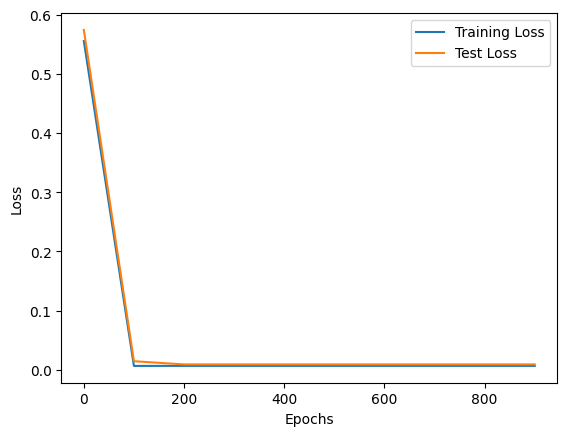

Saving model to: models/mylinearmodel.pth
Loaded model:
LinearRegressionMdl(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
New model device: cuda:0
tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')


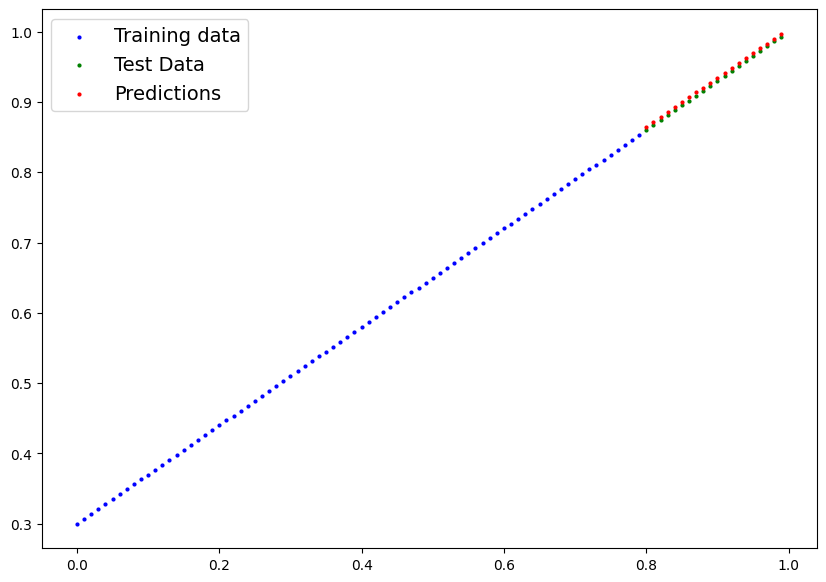

In [16]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from pathlib import Path
from pprint import pprint
torch.__version__
torch.manual_seed(42)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using Device: {device}")

#Creating data
X = torch.arange(start=0, end=1, step=0.01).unsqueeze(dim=1)
weight, bias = 0.7, 0.3
Y = weight * X + bias

#Splitting the data
train_split = int(0.8 * len(X))
X_train, Y_train, X_test, Y_test = X[:train_split], Y[:train_split], X[train_split:], Y[train_split:]
print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}")

#Creating the Model. One change is we use nn.Linear to create params instead of torch.Parameter
class LinearRegressionMdl(nn.Module):
    def __init__(self):
        super(LinearRegressionMdl, self).__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.linear_layer(x)

#Training the model
linearmodel = LinearRegressionMdl()

print(f"Linear model initial: {linearmodel}")
print(f"Linear model initial state dict: {linearmodel.state_dict()}")
print(f"Model currently using device: {next(linearmodel.parameters()).device}")
#Moving the model to gpu device it if exists
linearmodel.to(device)
print(f"After - Model currently using device: {next(linearmodel.parameters()).device}")

#Move our data to device if exists
X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)

epochs = 1000
epoch_count = []
train_losses = []
test_losses = []
optimizer = torch.optim.SGD(params=linearmodel.parameters(), lr=0.01)
loss_fn = torch.nn.L1Loss()
for i in range(epochs):
    linearmodel.train()
    Y_train_preds = linearmodel(X_train)
    loss = loss_fn(Y_train_preds, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #eval
    linearmodel.eval()
    with torch.inference_mode():
        Y_test_preds = linearmodel(X_test)
        test_loss = loss_fn(Y_test_preds, Y_test)
    if i % 100 == 0:
        epoch_count.append(i)
        train_losses.append(loss.cpu().detach().numpy())
        test_losses.append(test_loss.cpu().detach().numpy())
        print(f"Epoch: {i} | Training Loss: {loss} | Test Loss: {test_loss}")

print("The model learned the following values for weights and bias:")
pprint(linearmodel.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

#Plot the learning curve
plt.plot(epoch_count, train_losses, label="Training Loss")
plt.plot(epoch_count, test_losses, label="Test Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

#Saving the model
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "mylinearmodel.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=linearmodel.state_dict(), f=MODEL_SAVE_PATH)

#Load the model
mynewmodel = LinearRegressionMdl()
mynewmodel.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print(f"Loaded model:\n{mynewmodel}")

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
mynewmodel.to(device)
print(f"New model device: {next(mynewmodel.parameters()).device}")

#inference with the loaded model
mynewmodel.eval()
with torch.inference_mode():
    Y_test_preds_loaded = mynewmodel(X_test)
    test_loss_loaded = loss_fn(Y_test_preds_loaded, Y_test)

print(Y_test_preds_loaded == Y_test_preds)
#plot the predictions
def plot_predictions(train_data=X_train, train_labels=Y_train,
                     test_data=X_test, test_labels=Y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size":14})
    plt.show()

#plot_predictions(predictions=y_preds) # -> won't work... we need to chnage it to cpu to perform matplotlib numpy operation which needs data on CPU
plot_predictions(X_train.cpu(), Y_train.cpu(), X_test.cpu(), Y_test.cpu(), Y_test_preds_loaded.cpu())


###**Exercises**
All exercises have been inspired from code throughout the notebook.

There is one exercise per major section.

You should be able to complete them by referencing their specific section.

**Note**: For all exercises, your code should be device agnostic (meaning it could run on CPU or GPU if it's available).

- Create a straight line dataset using the linear regression formula (weight * X + bias).
- Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
- Split the data into 80% training, 20% testing.
- Plot the training and testing data so it becomes visual.
- Build a PyTorch model by subclassing nn.Module.
- Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
- Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
- Once you've constructed the model, make an instance of it and check its state_dict().

**Note**: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

- Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
    - Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
    - Write a training loop to perform the appropriate training steps for 300 epochs.
    - The training loop should test the model on the test dataset every 20 epochs.
- Make predictions with the trained model on the test data.
    - Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).
- Save your trained model's state_dict() to file.
    - Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
    - Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

**Resource**: See the exercises notebooks templates and solutions on the course GitHub.



Initial data X shape: torch.Size([100, 1])
Initial data Y shape: torch.Size([100, 1])
Training data X: torch.Size([80, 1]), Y: torch.Size([80, 1])
Test data X:  torch.Size([20, 1]), Y: torch.Size([20, 1])
Device of Model initially: cpu
Device of Model After: cuda:0
Initial Model params OrderedDict([('weight', tensor([0.3367], device='cuda:0')), ('bias', tensor([0.1288], device='cuda:0'))])
Final Model params OrderedDict([('weight', tensor([0.3067], device='cuda:0')), ('bias', tensor([0.9011], device='cuda:0'))])


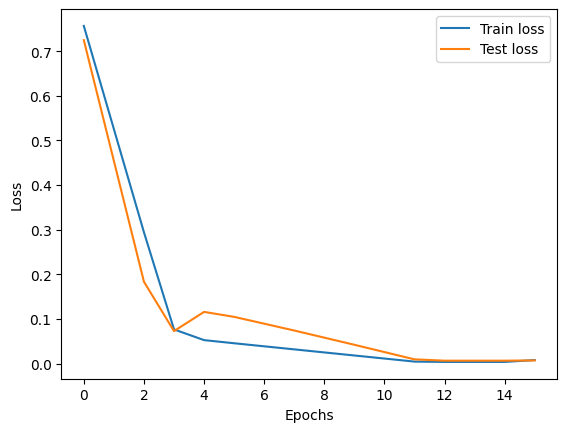

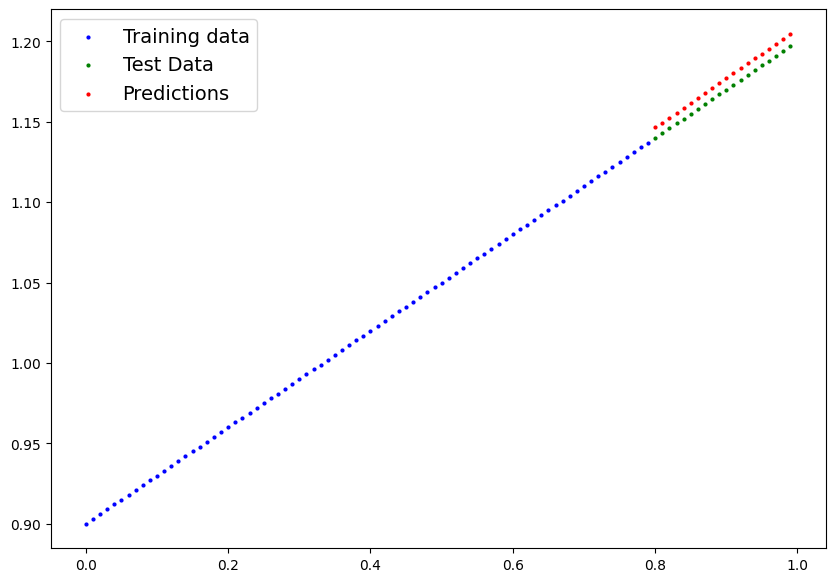

Loaded Model params OrderedDict([('weight', tensor([0.3067], device='cuda:0')), ('bias', tensor([0.9011], device='cuda:0'))])
tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')


In [18]:
#imports
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

#create data
X = torch.arange(0, 1, 0.01).unsqueeze(dim=1)
weight = 0.3
bias = 0.9
Y = weight * X + bias #true function
print(f"Initial data X shape: {X.shape}")
print(f"Initial data Y shape: {Y.shape}")

#Create splits
train_split = int(len(X) * 0.8)
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]
print(f"Training data X: {X_train.shape}, Y: {Y_train.shape}")
print(f"Test data X:  {X_test.shape}, Y: {Y_test.shape}")

#device agnostic
device = (torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu"))

#create model
class MyLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float)
        )
        self.bias = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float)
        )

    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.weight * x + self.bias

torch.manual_seed(42)
mymodel = MyLinearModel()
print(f"Device of Model initially: {next(mymodel.parameters()).device}")
mymodel.to(device)
print(f"Device of Model After: {next(mymodel.parameters()).device}")
X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)
print(f"Initial Model params {mymodel.state_dict()}")

#training loop
torch.manual_seed(42)
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=mymodel.parameters(), lr=0.01)
epochs = 300
train_losses = []
eval_losses = []
for i in range(epochs):
    #forward pass
    mymodel.train()
    Y_train_preds = mymodel(X_train)
    loss = loss_fn(Y_train_preds, Y_train)
    #backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if np.ceil(i % 20) == 0 or i == epochs-1:
        train_losses.append(loss.cpu().detach().numpy())
        mymodel.eval()
        with torch.inference_mode():
            y_eval_preds = mymodel(X_test)
        eval_loss = loss_fn(y_eval_preds, Y_test)
        eval_losses.append(eval_loss.cpu().detach().numpy())

print(f"Final Model params {mymodel.state_dict()}")

#print the learning curve
plt.plot(train_losses, label="Train loss")
plt.plot(eval_losses, label="Test loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

#plot the preds
def plot_predictions(train_data=X_train, train_labels=Y_train,
                     test_data=X_test, test_labels=Y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size":14})
    plt.show()

plot_predictions(X_train.cpu(), Y_train.cpu(),
                 X_test.cpu(), Y_test.cpu(),
                 predictions=y_eval_preds.cpu())

#Model saving
modelpath = Path("models")
modelpath.mkdir(parents=True, exist_ok=True)

modelname = "01_linear_reg_300epochs.pth"
modelsavepath = modelpath / modelname

torch.save(obj=mymodel.state_dict(), f=modelsavepath)

#load the saved model
newmodel = MyLinearModel()
newmodel.to(device)
newmodel.load_state_dict(torch.load(f=modelsavepath))

print(f"Loaded Model params {newmodel.state_dict()}")

newmodel.eval()
with torch.inference_mode():
    y_eval_preds_new = newmodel(X_test)

print(y_eval_preds_new == y_eval_preds)


In [17]:
print(y_eval_preds_new.shape)
print(y_eval_preds.shape)

torch.Size([20, 1])
torch.Size([20, 1])


### **Extra-curriculum**

- Read What is torch.nn, really? by Jeremy Howard for a deeper understanding of how one of the most important modules in PyTorch works. https://pytorch.org/tutorials/beginner/nn_tutorial.html#using-torch-nn-functional
- Spend 10-minutes scrolling through and checking out the PyTorch documentation cheatsheet for all of the different PyTorch modules you might come across. https://pytorch.org/tutorials/beginner/ptcheat.html#data-utilities
- Spend 10-minutes reading the loading and saving documentation on the PyTorch website to become more familiar with the different saving and loading options in PyTorch. https://pytorch.org/tutorials/beginner/saving_loading_models.html
- Spend 1-2 hours read/watching the following for an overview of the internals of gradient descent and backpropagation, the two main algorithms that have been working in the background to help our model learn.
    - Wikipedia page for gradient descent
    - Gradient Descent Algorithm — a deep dive by Robert Kwiatkowski
    - Gradient descent, how neural networks learn video by 3Blue1Brown
    - What is backpropagation really doing? video by 3Blue1Brown
    - Backpropagation Wikipedia Page